In [3]:
print("hello world")
print("good mroning!!!!!!ß")

hello world
good mroning!!!!!


# Coinbase Data Analyst Take Home Exam

- Yucheng Liu: <yc.yuchengliu@gmail.com>
- October 2024

## Abstract
This project demonstrates key technical skills needed for a data analyst role at Coinbase Internal Audit. I utilized Snowflake (TBD add connector link) SQL to analyze datasets by joining and aggregating provided tables. Additionally, I used Python in Jupyter Notebook with libraries such as Pandas for data manipulation, and scatter plots to explore correlations in the data. I also integrated the [CryptoCompare API](https://pypi.org/project/cryptocompare/) to retrieve real-time cryptocurrency prices.

## Github Repo

In addition to this notebook, the project is also available in my repo. Please use the links below.
- [Notebook tbd](xxx)
- [SQL tbd](xxx)

## Datasets Used

In this project, we use three distinct csv files containing data for the following:
- **Users**, including an id, date the user signed up, and their risk score (a number assigned by our internal risk model).
- **Accounts** for those users, including the date the account was created, and currency.
- **Ledger** Entries for these accounts; these are single-entry, indicating the date and amount by which the account changed.

#### Import Libraries

In [12]:
#!pip install pandas
#!pip install matplotlib
#!pip install cryptocompare
#!pip install snowflake-connector-python
#!pip install seaborn

In [31]:
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt
import cryptocompare as cy
import seaborn as sns 

#### Connect to Snowflake

In [3]:
sf_pw = input('Enter Password:')

con = snowflake.connector.connect(
    user = 'yuchengliu',
    password = sf_pw,
    account = 'ed01722.us-east4.gcp',
    warehouse = 'COMPUTE_WH'
)
con.cursor()
print("Snowflake Connected Successfully!")

Snowflake Connected Successfully!


#### Helper Function(s)

In [47]:
#get_sf_data function retrieves data from snowflake by executing a SQL query and returns the results in dataframe for analysis.
def get_sf_data(query):
    sql = query 
    output_df = pd.read_sql(sql, con)
    return output_df

def get_simple_plot(dataframe_column, title, x_lable, y_lable):
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe_column, binwidth=1)
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.show()

### Question 1  
**Task: Draw an entity-relationship diagram for the data. Indicate the cardinality of the relationships.**

![title](tbd)


### Question 2  
**Task: Load the CSV files into a SQL database.**

I created a free Snowflake account and uploaded the three CSV files. Below is a screenshot of the datasets after they were successfully loaded.  

| # | File Name | Snowflake Table Name
|-----------------|-----------------|-----------------|
| 1 | accounts.csv | COINBASE.PUBLIC.ACCOUNTS |
| 2 | users.csv | COINBASE.PUBLIC.USERS |
| 3 | ledger.csv | COINBASE.PUBLIC.LEDGER |

![title](screenshot_sf.png)

### Question 3
**Task: Calculate and plot the following distributions**

a. Number of accounts per user

In [38]:
#The query counts the number of accounts for each user. We use LEFT JOIN here to ensure that uses with 0 accounts are also included.
q3_a_query = f"""
        SELECT 
            u.user_id,
            COUNT(a.account_id) AS number_of_accounts
        FROM COINBASE.PUBLIC.USERS u
        LEFT JOIN COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
        GROUP BY 1
        ORDER BY 2 DESC;
"""

#once the query is built, we can call get_sf_data function to retreive data in dataframe format.
number_of_account_per_user = get_sf_data(q3_a_query)
number_of_account_per_user.head(10)

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_24189/4219864176.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,NUMBER_OF_ACCOUNTS
0,28c6d03ee715c3c6a69cd960ca404123,130
1,2728a6faf3a6de76ca9fcb456f583dc8,17
2,5867ac641fb362074ac1bc6dde7f0c5f,16
3,91c0fbdf1ce91ab3b175a5510f9a8a63,15
4,b200203a377aa50d31dd589ce5cc018f,12
5,c1942d1b8570cb346c3b55f28e0ddad5,11
6,bbb45a52e1a3bc9ac178a907c57d555b,11
7,8e9379e729b4439c32f81dec2f2fa569,10
8,a00acd0117e6cccfade7a09c65cbe204,10
9,9d5ca06f5661dbf5324f4aba3e509e9d,9


In [39]:
number_of_account_per_user['NUMBER_OF_ACCOUNTS'].describe()

count    1000.0000
mean        4.7110
std         4.1534
min         2.0000
25%         4.0000
50%         4.0000
75%         5.0000
max       130.0000
Name: NUMBER_OF_ACCOUNTS, dtype: float64

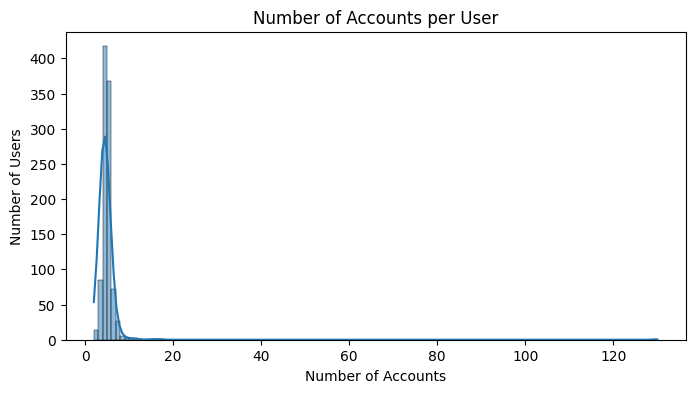

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(number_of_account_per_user['NUMBER_OF_ACCOUNTS'], kde=True, binwidth=1)
plt.title('Number of Accounts per User')
plt.xlabel('Number of Accounts')
plt.ylabel('Number of Users')
plt.show()

Looking at the number of accounts per user plot above, we can make a few observations:

- Most users tend to have around 4 to 5 accounts, with a median of 4 accounts.  
- The average number of accounts per user is about 4.71, but there's significant variation in account ownership, with the highest being 130 accounts.  
- Most users have a small to moderate number of accounts, but there are some outliers with many accounts.

b. Number of distinct currencies per user.

In [43]:
q3_b_query = f"""
            SELECT u.user_id,
                COUNT(DISTINCT(a.currency)) AS number_of_distinct_currencies
            FROM COINBASE.PUBLIC.USERS u
            LEFT JOIN COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
            GROUP BY 1
            ORDER BY 2 DESC;
"""

number_of_currency_per_user = get_sf_data(q3_b_query)
number_of_currency_per_user.head(10)

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_24189/3099901780.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,NUMBER_OF_DISTINCT_CURRENCIES
0,befbddf34f71095d3fe49efd79a8996e,5
1,849b234ec990304fb126b8f5c4d80662,5
2,48cc9779135b57b6a8d4052e93bb843a,5
3,9809ea41344fe457cdf908e5c55562b4,5
4,e32a56807ab3e71bb5e07f7ffc8c5174,5
5,c8691d1c60e9537da42e187170ab369f,5
6,6b2f573b84f1cb31d3d6031016816d43,5
7,083743fdb35ded42d3b6cd68e2d3fa68,5
8,e860c1f7ee8c4ac2d1d1b060c93b2b44,5
9,8a769296f770704d32e2b754a29d85ea,5


In [45]:
number_of_currency_per_user['NUMBER_OF_DISTINCT_CURRENCIES'].describe()

count    1000.000000
mean        3.371000
std         0.712648
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: NUMBER_OF_DISTINCT_CURRENCIES, dtype: float64

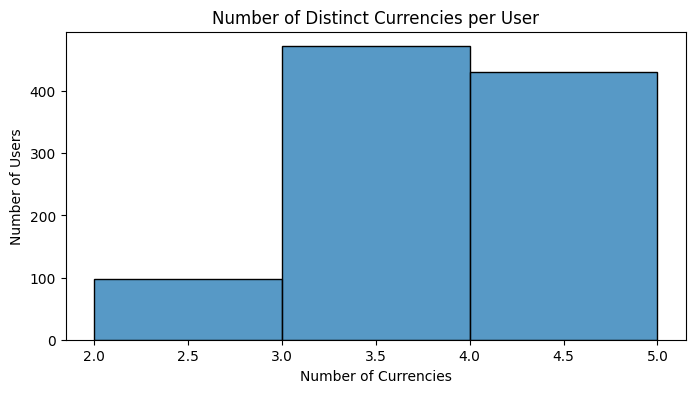

In [48]:
get_simple_plot(number_of_currency_per_user['NUMBER_OF_DISTINCT_CURRENCIES'], 'Number of Distinct Currencies per User', 'Number of Currencies', 'Number of Users')

### Question 7
 
Find a source of crypto prices online. Extract the price data and write a script that generates a corresponding table. Use the table to provide a time series for:

- The dollar value of all crypto assets in user accounts, i.e. what is the total value held in all wallets as a function of time.
- The dollar value of assets flows in and out of user accounts, i.e. what is the net flow of value into or out of all accounts in aggregate.

In [2]:
KEY = '639ef0f8b451f07328392747b6b25ea2dc79e27c2ea163d4ee60491198aa3ee6'

cy.cryptocompare._set_api_key_parameter(KEY)


NameError: name 'cy' is not defined

In [7]:
cy.get_price('BTC', currency='USD')


{'BTC': {'USD': 59211.99}}